In [3]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#load dataset
df = pd.read_csv('full_data.csv')

In [66]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22357 entries, 0 to 22356
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Temperature (°C)                    22357 non-null  float64
 1   Tan(delta)                          22357 non-null  float64
 2   Storage modulus (MPa)               22357 non-null  float64
 3   Loss modulus (MPa)                  22357 non-null  float64
 4   Formulation                         22357 non-null  object 
 5   Polymerization                      22357 non-null  int64  
 6   Sample Number                       22357 non-null  int64  
 7   R (J/K*mol)                         22357 non-null  float64
 8   Temp (K)                            22357 non-null  float64
 9   Average density of polymer (g/m^3)  22357 non-null  float64
 10  Mc (g/mol)                          22357 non-null  float64
 11  Mw                                  22357

In [54]:
#preview of the dataset
df.head()

,Temperature (°C),Tan(delta),Storage modulus (MPa),Loss modulus (MPa),Formulation,Polymerization,Sample Number,R (J/K*mol),Temp (K),Average density of polymer (g/m^3),Mc (g/mol),Mw,q (crosslink density)
0,20.01,0.040823,0.195470,0.00798,1:4:95,365,2,8.314,293.01,1090000.0,13600.0,473.8500,0.0349
1,20.01,0.030844,0.087032,0.00268,1:1:98,365,2,8.314,293.01,1090000.0,30500.0,480.1125,0.0157
2,20.02,0.003380,0.924994,0.00313,5:15:80,365,2,8.314,293.02,1090000.0,2870.0,459.6875,0.1600
3,20.02,0.003380,0.924994,0.00313,5:15:80,365,3,8.314,293.02,1090000.0,2870.0,459.6875,0.1600
4,20.03,0.006200,1.171640,0.00727,5:5:90,365,3,8.314,293.03,1090000.0,2270.0,480.5625,0.2120


In [68]:
#description of the dataset
df.describe()

,Temperature (°C),Tan(delta),Storage modulus (MPa),Loss modulus (MPa),Polymerization,Sample Number,R (J/K*mol),Temp (K),Average density of polymer (g/m^3),Mc (g/mol),Mw,q (crosslink density)
count,22357.000000,22357.000000,22357.000000,22357.000000,22357.000000,22357.000000,2.235700e+04,22357.000000,22357.0,2.235700e+04,22357.000000,22357.000000
mean,60.548402,0.006907,0.477261,0.002971,309.462763,2.005725,8.314000e+00,333.548402,1090000.0,-7.873296e+03,472.683252,0.074122
std,23.223627,0.424049,0.553164,0.034424,55.501229,0.814282,3.552793e-15,23.223627,0.0,1.742899e+06,7.836684,0.084724
min,20.000000,-39.068300,-0.000349,-4.485900,254.000000,1.000000,8.314000e+00,293.000000,1090000.0,-1.950000e+08,459.687500,-0.000051
25%,40.500000,0.004360,0.104184,0.001010,254.000000,1.000000,8.314000e+00,313.500000,1090000.0,2.790000e+03,463.412500,0.016800
50%,60.520000,0.009030,0.172867,0.001960,254.000000,2.000000,8.314000e+00,333.520000,1090000.0,1.720000e+04,473.850000,0.027800
75%,80.630000,0.016646,1.018480,0.003810,365.000000,3.000000,8.314000e+00,353.630000,1090000.0,2.850000e+04,480.112500,0.168000
max,100.650000,13.732700,5.376310,0.790873,365.000000,3.000000,8.314000e+00,373.650000,1090000.0,4.530000e+07,480.562500,0.806000


In [56]:
#find the shape of the dataset
df.shape

(22357, 13)

In [5]:
df.isnull().sum() / len(df) * 100  # percent missing per column

Temperature (°C)                      0.0
Tan(delta)                            0.0
Storage modulus (MPa)                 0.0
Loss modulus (MPa)                    0.0
Formulation                           0.0
Polymerization                        0.0
Sample Number                         0.0
R (J/K*mol)                           0.0
Temp (K)                              0.0
Average density of polymer (g/m^3)    0.0
Mc (g/mol)                            0.0
Mw                                    0.0
q (crosslink density)                 0.0
dtype: float64

In [11]:
Q1 = df['Loss modulus (MPa)'].quantile(0.25)
Q3 = df['Loss modulus (MPa)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Loss modulus (MPa)'] < lower_bound) | (df['Loss modulus (MPa)'] > upper_bound)]

# Number of outlier rows
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 2663


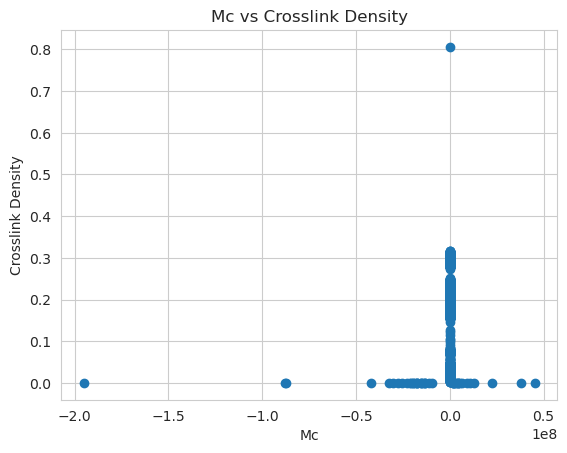

In [39]:
#plot Mc and q
plt.scatter(df['Mc (g/mol)'], df['q (crosslink density)'])
plt.xlabel('Mc')
plt.ylabel('Crosslink Density')
plt.title('Mc vs Crosslink Density');

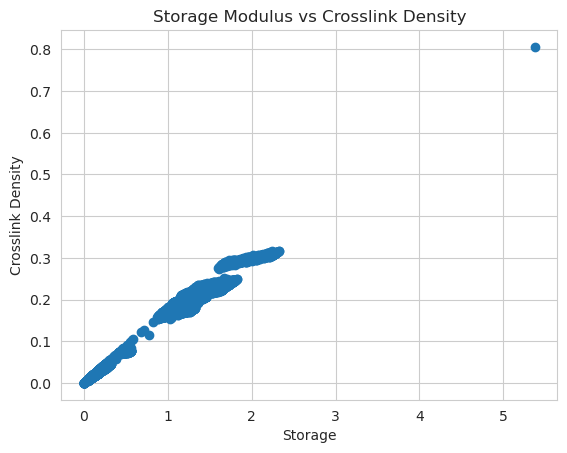

In [57]:
#plot the storage modulus and crosslink density to see the relationship.
plt.scatter(df['Storage modulus (MPa)'], df['q (crosslink density)'])
plt.xlabel('Storage')
plt.ylabel('Crosslink Density')
plt.title('Storage Modulus vs Crosslink Density');

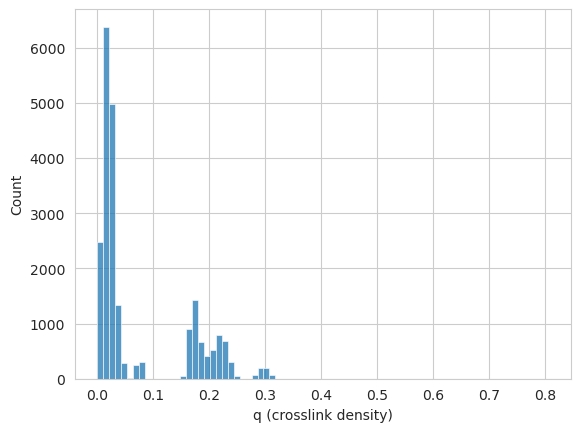

In [58]:
#histogram of the crosslink density as it is the target to see if it follows the bell curve
sns.histplot(df['q (crosslink density)']);

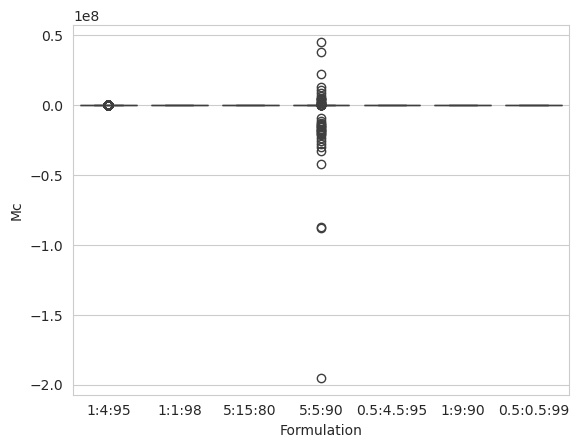

In [59]:
#plot formulation and the Mc
sns.boxplot(x=df['Formulation'], y=df['Mc (g/mol)'], data=df)
plt.xlabel('Formulation')
plt.ylabel('Mc');

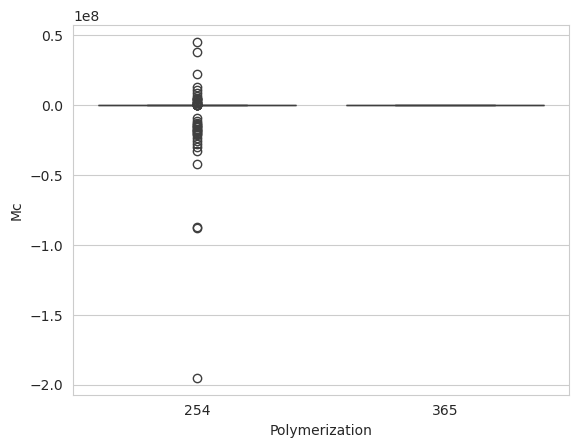

In [60]:
#plotting polymerization wavelength against the calculated Mc
sns.boxplot(x=df['Polymerization'], y=df['Mc (g/mol)'], data=df)
plt.xlabel('Polymerization')
plt.ylabel('Mc');

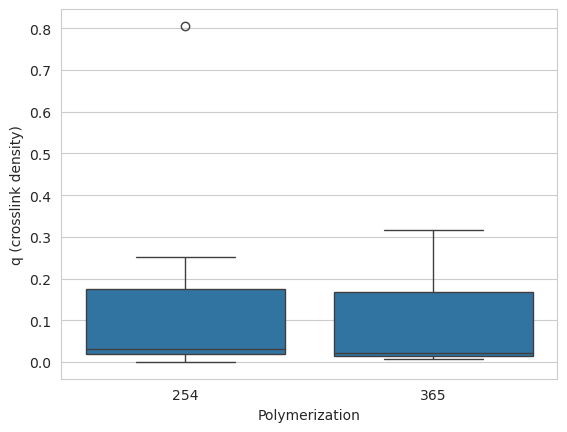

In [61]:
#plotting the polymerization and the crosslink density
sns.boxplot(x=df['Polymerization'], y=df['q (crosslink density)'], data=df)
plt.xlabel('Polymerization')
plt.ylabel('q (crosslink density)');

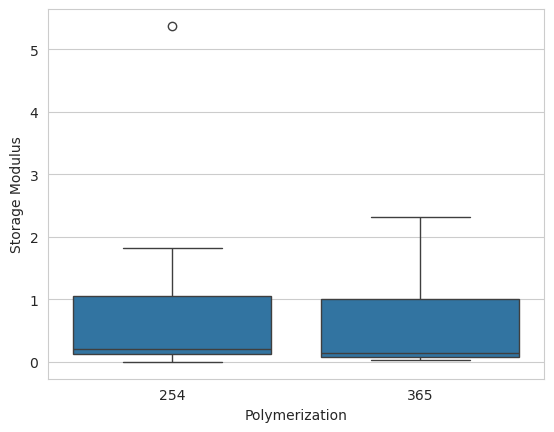

In [62]:
#Polymerization and storage modulus.
sns.boxplot(x=df['Polymerization'], y=df['Storage modulus (MPa)'], data=df)
plt.xlabel('Polymerization')
plt.ylabel('Storage Modulus');

<Axes: xlabel='Polymerization', ylabel='Storage modulus (MPa)'>

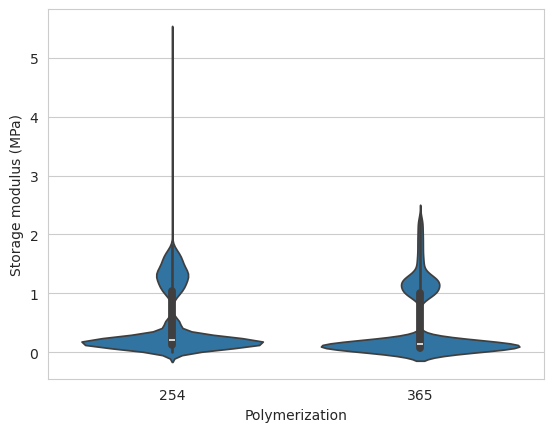

In [64]:
#plot violin plot to see box plot information with probability density
sns.violinplot(data=df, x=df['Polymerization'], y=df['Storage modulus (MPa)'])

In [43]:
sns.set_style("whitegrid");
sns.pairplot(df, hue='q (crosslink density)', height=8);
plt.show()